In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Here we import the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Here we are mounting drive to colab in order to easily access the datasets

In [ ]:
!ls "/content/gdrive/My Drive/PRML Dataset/Dataset1"

test23.csv  train23.csv


Checking if the mounted grive folder consists of the necessary datasets




In [ ]:
class matrixFunctions:
  def transpose(self, X):
    Xt = []
    for i in range(len(X[0])):
        Xt.append([])
        for j in range(len(X)):
            Xt[i].append(X[j][i])
    return Xt

  def matrixMult(self, A, B):
    C = []
    for i in range(len(A)):
      C.append([])
      for j in range(len(B[0])):
        C[i].append(0)
    for i in range(len(A)):
      for k in range(len(B[0])):
        for j in range(len(B)):
          C[i][k] += A[i][j]*B[j][k]
    return C

  def matrixAdd(self,A,B):
    C = []
    for i in range(len(A)):
      C.append([])
      for j in range(len(A[0])):
        C[i].append(0)
    for i in range(len(A)):
      for j in range(len(A[0])):
        C[i][j] = A[i][j] + B[i][j]
    return C
    
  def matrixInverse(self, M):
     n = len(M)
     for i in range(n):
       I = []
       for j in range(n):
         if i == j:
           I.append(1)
         else:
           I.append(0)
       M[i].extend(I)
     for i in range(0, n):
       j = 1
       pivot = M[i][i]
       while pivot == 0 and i + j < n:
         for l in range(len(M[i])):
           t = M[i][l]
           M[i][l] = M[i+j][l]
           M[i+j][l] = t
         j += 1
         pivot = M[i][i]
       if pivot == 0:
         M_inv = []
         for i in range(0, n):
           M_inv.append(M[i][n:])
         return M_inv
       for j in range(0, len(M[i])):
         M[i][j] /= pivot
       for j in range(0, n):
         if j == i:
           continue
         k = M[j][i]
         for l in range(len(M[j])):
           M[j][l] -= (M[i][l] * k)
     M_inv = []
     for i in range(n):
       M_inv.append(M[i][n:])
     return M_inv

Here we are defining the standard matrix functions that we are going to use later on while making the models. All of the functions here have been developed from scratch including matrix transpose, matrix multiplication and matrix inverse.

In [ ]:
def meanSquaredError(Y_pred,Y):
  sum = 0
  for i in range(len(Y)):
    sum += (Y_pred[i]-Y[i])**2
  n = len(Y)
  MSE = sum/len(Y)
  return MSE

In [ ]:
class linearRegression:
  X = []
  y = []
  coefs = []
  def __init__(self, X, y):
    self.X = X
    self.y = y
  def runTraining(self):
    mf = matrixFunctions()
    Xn = []
    for i in range(len(self.X)):
      Xn.append([])
      Xn[i] = self.X[i]
    Xn = np.array(Xn)
    Xt = mf.transpose(Xn)
    F = mf.matrixMult(Xt, Xn)
    F_inv = mf.matrixInverse(F)
    psInv = mf.matrixMult(F_inv, Xt)
    self.coefs = mf.matrixMult(psInv, self.y)
    self.coefs = np.linalg.pinv(Xn)@self.y

  def runTesting(self, X_test):
    Y_pred = []
    for i in range(len(X_test)):
      ans = 0
      for j in range(0, len(self.coefs)):
        ans += X_test[i][j]*self.coefs[j][0]
      Y_pred.append(ans)
    Y_pred = np.array(Y_pred)
    return Y_pred

Here we define the Linear Regression function.
We use the formula $\beta$ = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y to calculate the best fit coefficients for each 

In [ ]:
a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset1/train23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
for i in range(len(Input[0])):
    for j in range(0, len(Input)):
        Input[j][i] = float(Input[j][i])
X = []
Y = []
y = []
for i in range(len(Input)):
  X.append([])
  Y.append([])
  X[i].append(1)
  for j in range(len(Input[0]) - 1):
    X[i].append(Input[i][j])
  X[i] = np.array(X[i])
  Y[i].append(Input[i][-1])
  Y[i] = np.array(Y[i])
  y.append(Input[i][-1])

X = np.array(X)
Y = np.array(Y)
y = np.array(y)
X_train = X[:60]
X_valid = X[60:]
Y_train = Y[:60]
y_valid = y[60:]
LR = linearRegression(X_train, Y_train)
LR.runTraining()
print(LR.coefs)
print(meanSquaredError(LR.runTesting(X_valid), y_valid))

[[  419.92792125]
 [  307.20679396]
 [-8386.27015323]]
66058176.686850145


We test the model against training data to see if it's working properly

In [ ]:
class polynomialRegression:
  X = []
  Y = []
  coefs = []
  deg = 0
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
  def runTraining(self, deg):
    self.deg = deg
    Xn = []
    for i in range(len(self.X)):
      Xn.append([])
      Xn[i] = self.X[i]
    xt = []
    for k in range(len(self.X)):
      xt.append([])
      for i in range(2, deg + 1):
        for j in range(i + 1):
          c = (Xn[k][1]**j)*(Xn[k][2]**(i - j))
          xt[k].append(c)
    Xn = np.array(Xn)
    Xn = np.append(Xn, xt, axis = 1)
    LR = linearRegression(Xn, self.Y)
    LR.runTraining()
    self.coefs = LR.coefs
  def runTesting(self, X_test):
    Xn = []
    for i in range(len(X_test)):
      Xn.append([])
      Xn[i] = X_test[i]
    xt = []
    for k in range(len(Xn)):
      xt.append([])
      for i in range(2, self.deg + 1):
        for j in range(i + 1):
          c = (Xn[k][1]**j)*(Xn[k][2]**(i - j))
          xt[k].append(c)
    Xn = np.array(Xn)
    Xn = np.append(Xn, xt, axis = 1)
    Y_pred = []
    for i in range(len(Xn)):
      ans = 0
      for j in range(0, len(self.coefs)):
        ans += Xn[i][j]*self.coefs[j][0]
      Y_pred.append(ans)
    Y_pred = np.array(Y_pred)
    return Y_pred   

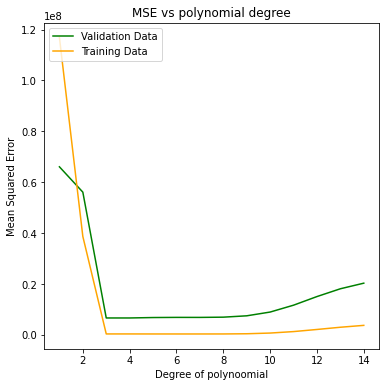

The Best Model is obtained for 3-degree polynomial which has MSE = [6636698.88216653]


In [ ]:
index = []
MSE = []
MSE_train = []
pr = polynomialRegression(X_train, Y_train)
min_MSE = 1e50
best_index = 0
for i in range(1, 15):
  pr.runTraining(i)
  index.append(i)
  MSE.append(meanSquaredError(pr.runTesting(X_valid), y_valid))
  MSE_train.append(meanSquaredError(pr.runTesting(X_train), y[:60]))
  if min_MSE > meanSquaredError(pr.runTesting(X_valid), y_valid):
    min_MSE = meanSquaredError(pr.runTesting(X_valid), y_valid)
    best_index = i

plt.rcParams["figure.figsize"] = [6, 6]
plt.plot(index, MSE, color = 'green', label = 'Validation Data')
plt.plot(index, MSE_train, color = 'orange', label = 'Training Data')
plt.title("MSE vs polynomial degree")
plt.xlabel("Degree of polynoomial")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper left")
plt.show()

print(f"The Best Model is obtained for {best_index}-degree polynomial which has MSE = {min_MSE}")

The Best Model is obtained for 3-degree polynomial which has MSE = 6636698.882153075 on the validation set

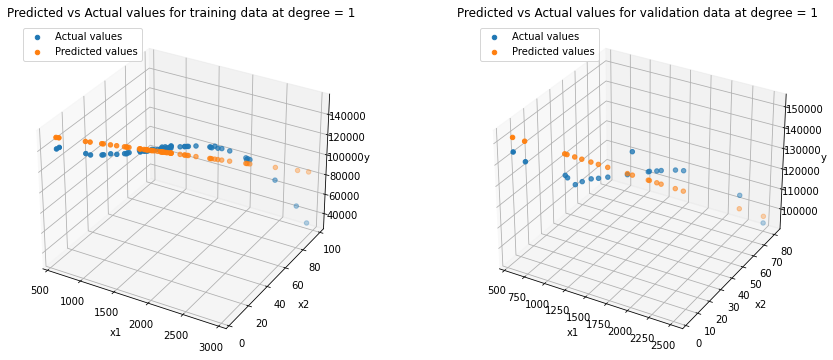

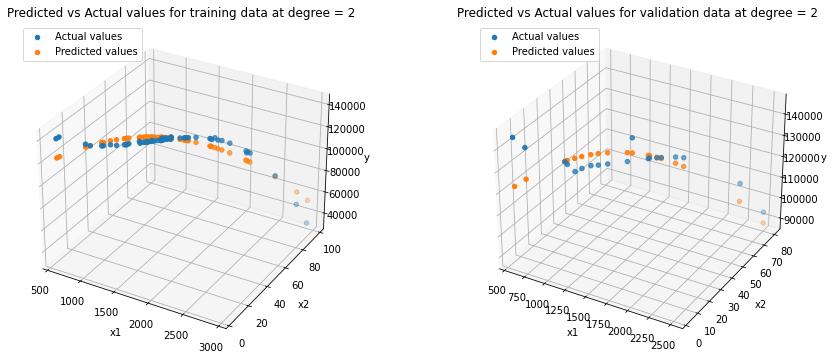

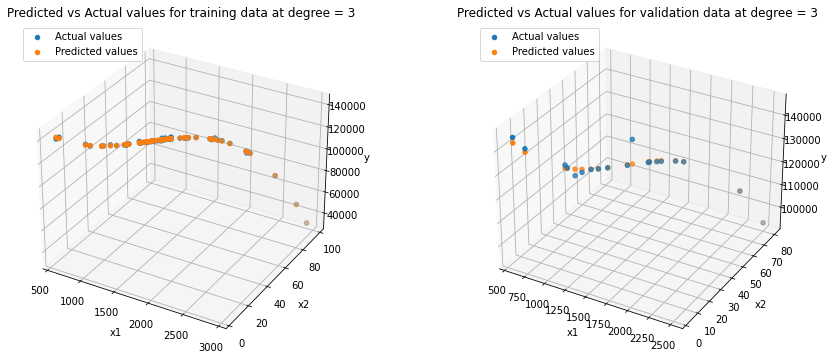

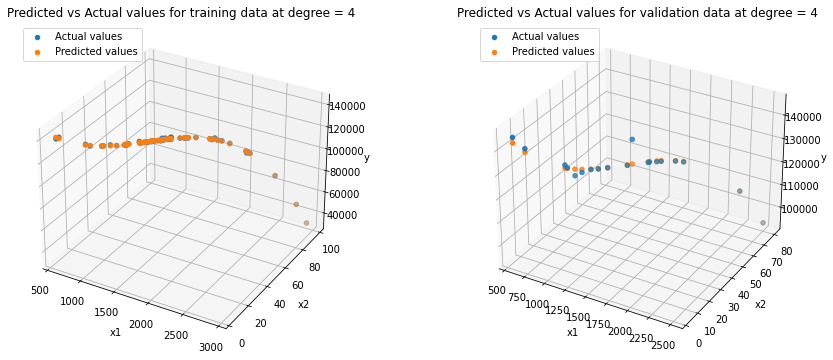

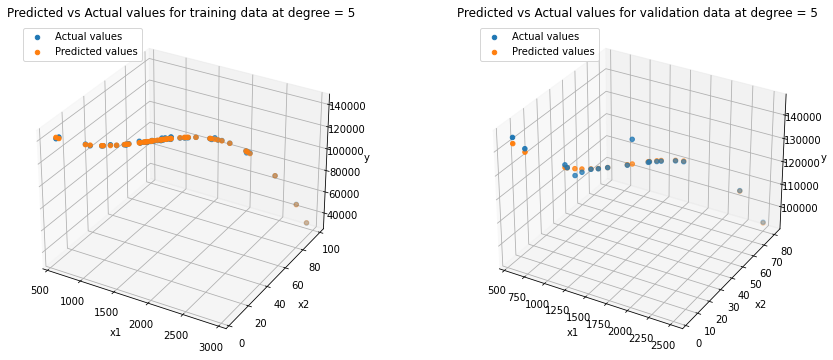

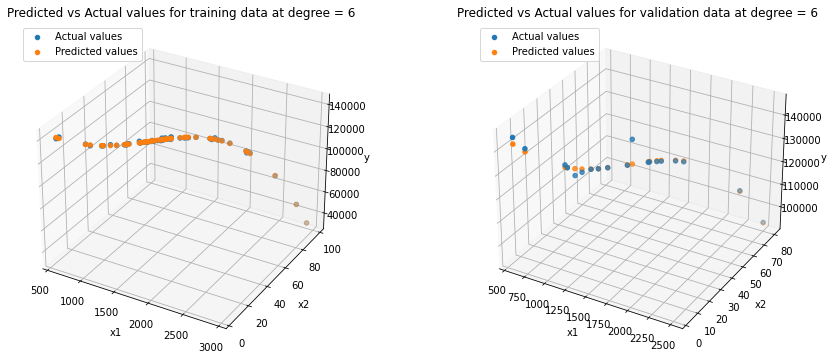

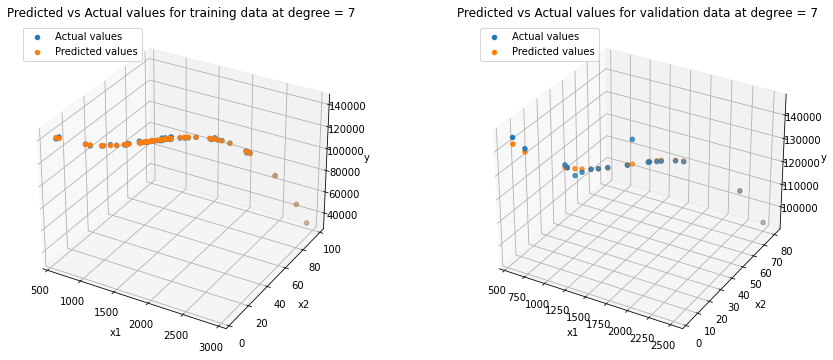

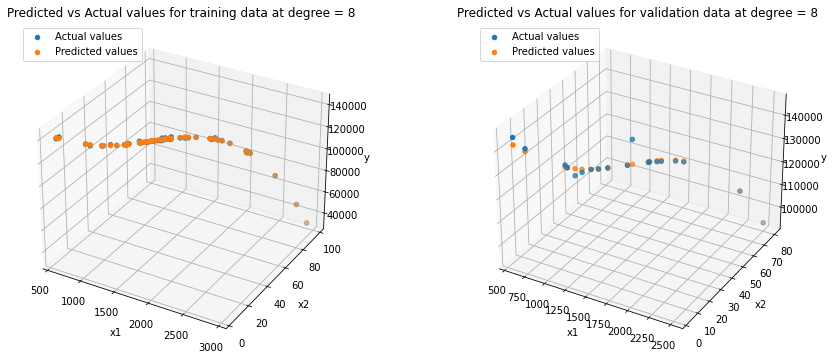

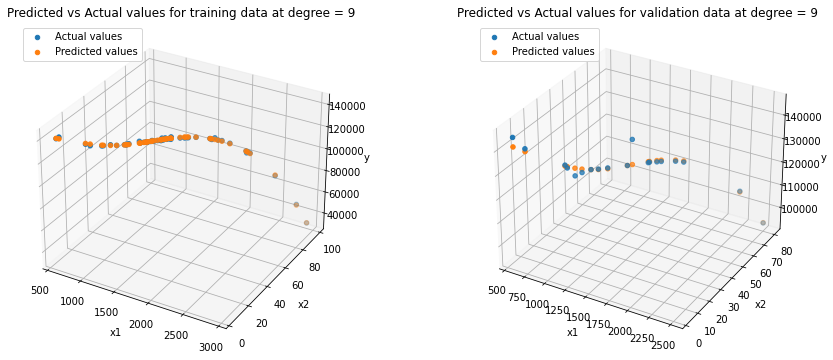

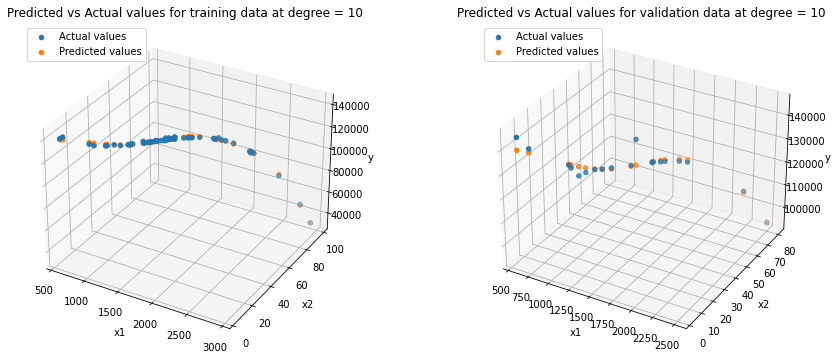

In [ ]:
#from mpl_toolkits import mplot3d
plt.rcParams["figure.figsize"] = [6, 6]
for i in range(1, 11):
  pr.runTraining(i)
  fig = plt.figure(figsize=plt.figaspect(0.4))
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('y')
  ax.set_title(f"Predicted vs Actual values for training data at degree = {i}")
  ax.scatter3D(X_train[:,1].flatten(), X_train[:,2].flatten(), Y_train.flatten(), label = 'Actual values')
  ax.scatter3D(X_train[:,1].flatten(), X_train[:,2].flatten(), pr.runTesting(X_train).flatten(), label = 'Predicted values')
  ax.legend(loc="upper left")
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.scatter3D(X_valid[:,1].flatten(), X_valid[:,2].flatten(), y_valid.flatten(), label = 'Actual values')
  ax.scatter3D(X_valid[:,1].flatten(), X_valid[:,2].flatten(), pr.runTesting(X_valid).flatten(), label = 'Predicted values')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('y')
  ax.set_title(f"Predicted vs Actual values for validation data at degree = {i}")
  ax.legend(loc="upper left")
  plt.show()

From the figure and the MSE curve we can see that the model begins to overfit for a value of around n = 12. Hence in ridge regression we will use n = 12

In [ ]:
a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset1/test23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
for i in range(len(Input[0])):
    for j in range(0, len(Input)):
        Input[j][i] = float(Input[j][i])
Xt = []
Yt = []
yt = []
for i in range(len(Input)):
  Xt.append([])
  Yt.append([])
  Xt[i].append(1)
  for j in range(len(Input[0]) - 1):
    Xt[i].append(Input[i][j])
  Xt[i] = np.array(Xt[i])
  Yt[i].append(Input[i][-1])
  Yt[i] = np.array(Y[i])
  yt.append(Input[i][-1])
Xt = np.array(Xt)
Yt = np.array(Yt)
yt = np.array(yt)

pr = polynomialRegression(X_train, Y_train)
pr.runTraining(3)
print(f"The Best Model (n = 3) yields an MSE = {meanSquaredError(pr.runTesting(X_train), y[:60])} on the training data")
print(f"The Best Model (n = 3) yields an MSE = {meanSquaredError(pr.runTesting(Xt), yt)} on the testing data")

The Best Model (n = 3) yields an MSE = 361186.1995475413 on the training data
The Best Model (n = 3) yields an MSE = 527459.7402422356 on the testing data


The Best Model (n = 3) yields an MSE = 361186.1995475413 on the training data <br>
The Best Model (n = 3) yields an MSE = 527459.7402422356 on the testing data

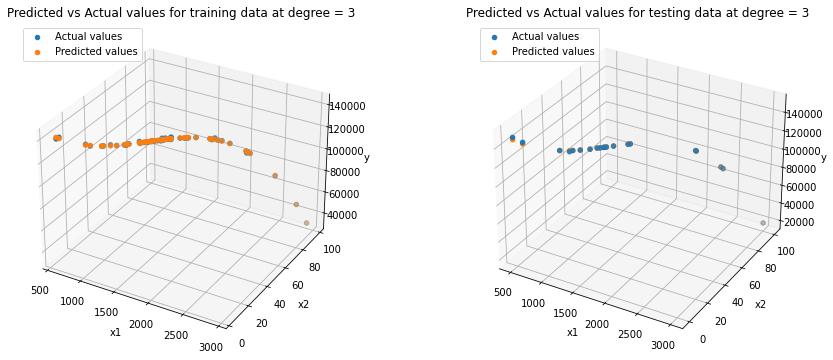

In [ ]:
pr.runTraining(3)
fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title(f"Predicted vs Actual values for training data at degree = {3}")
ax.scatter3D(X_train[:,1].flatten(), X_train[:,2].flatten(), Y_train.flatten(), label = 'Actual values')
ax.scatter3D(X_train[:,1].flatten(), X_train[:,2].flatten(), pr.runTesting(X_train).flatten(), label = 'Predicted values')
ax.legend(loc="upper left")
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Xt[:,1].flatten(), Xt[:,2].flatten(), yt.flatten(), label = 'Actual values')
ax.scatter3D(Xt[:,1].flatten(), Xt[:,2].flatten(), pr.runTesting(Xt).flatten(), label = 'Predicted values')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title(f"Predicted vs Actual values for testing data at degree = {3}")
ax.legend(loc="upper left")
plt.show()

In [ ]:
class ridgeRegression:
  X = []
  y = []
  coefs = []
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def runTraining(self,Lambda):
    mf = matrixFunctions()
    Xn = []
    for i in range(len(self.X)):
      Xn.append([])
      Xn[i] = self.X[i]
    Xn = np.array(Xn)
    Xt = mf.transpose(Xn)
    F = mf.matrixMult(Xt, Xn)
    I = np.identity(Xn.shape[1])
    I[0, 0] = 0
    A_biased = Lambda*I
    # F_new = mf.matrixAdd(F,T)                     
    # F_inv = np.linalg.inv(F_new)
    # psInv = mf.matrixMult(F_inv, Xt)
    self.coefs = np.linalg.inv(Xn.T.dot(Xn) + A_biased).dot(Xn.T).dot(self.y)

  def runTesting(self, X_test):
    Y_pred = []
    for i in range(len(X_test)):
      ans = 0
      for j in range(0, len(self.coefs)):
        ans += X_test[i][j]*self.coefs[j][0]
      Y_pred.append(ans)
    Y_pred = np.array(Y_pred)
    return Y_pred

def normalize(Xn):
  dev = np.std(Xn, axis = 0)
  mn = np.mean(Xn, axis = 0)
  for i in range(len(Xn)):
    for j in range(len(Xn[0])):
      if(dev[j] != 0): 
        Xn[i][j] = (Xn[i][j] - mn[j])/dev[j]
  return Xn

class polynomialRegression2:
  from sklearn.linear_model import Ridge
  X = []
  Y = []
  coefs = []
  deg = 0
  clf = 0
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
  def runTraining(self, deg, Lambda):
    from sklearn.linear_model import Ridge
    self.deg = deg
    Xn = []
    for i in range(len(self.X)):
      Xn.append([])
      Xn[i] = self.X[i]
    xt = []
    for k in range(len(self.X)):
      xt.append([])
      for i in range(2, deg + 1):
        for j in range(i + 1):
          c = (Xn[k][1]**j)*(Xn[k][2]**(i - j))
          xt[k].append(c)
    Xn = np.array(Xn)
    Xn = np.append(Xn, xt, axis = 1)
    normalize(Xn)
    LR = ridgeRegression(Xn, self.Y)
    LR.runTraining(Lambda)
    self.coefs = LR.coefs
  def runTesting(self, X_test):
    Xn = []
    for i in range(len(X_test)):
      Xn.append([])
      Xn[i] = X_test[i]
    xt = []
    for k in range(len(Xn)):
      xt.append([])
      for i in range(2, self.deg + 1):
        for j in range(i + 1):
          c = (Xn[k][1]**j)*(Xn[k][2]**(i - j))
          xt[k].append(c)
    Xn = np.array(Xn)
    Xn = np.append(Xn, xt, axis = 1)
    normalize(Xn)
    Y_pred = []
    for i in range(len(Xn)):
      ans = 0
      for j in range(0, len(self.coefs)):
        ans += Xn[i][j]*self.coefs[j][0]
      Y_pred.append(ans)
    Y_pred = np.array(Y_pred)
    return Y_pred   

Here we define Ridge Regression function. We use the formula $\beta$ = (X<sup>T</sup>X+λI)<sup>-1</sup>X<sup>T</sup>y

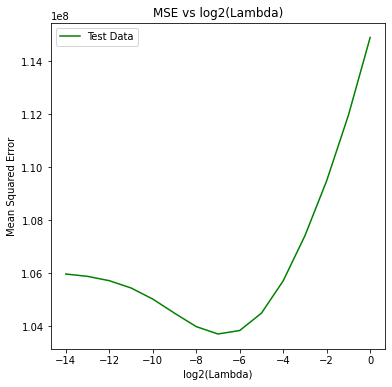

The Best Model is obtained for Lambda = 0.0078125 which has MSE = 103698729.6069701 on the test data


In [ ]:
index = []
MSE = []
MSE_train = []
pr2 = polynomialRegression2(X_train, Y_train)
min_MSE = 1e50
best_index = 0
for i in range(0, 15):
  pr2.runTraining(12, 2**(-i))
  index.append(-i)
  MSE.append(meanSquaredError(pr2.runTesting(Xt), yt))
  if min_MSE > meanSquaredError(pr2.runTesting(Xt), yt):
    min_MSE = meanSquaredError(pr2.runTesting(Xt), yt)
    best_index = i

plt.rcParams["figure.figsize"] = [6, 6]
plt.plot(index, MSE, color = 'green', label = 'Test Data')
plt.title("MSE vs log2(Lambda)")
plt.xlabel("log2(Lambda)")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper left")
plt.show()

print(f"The Best Model is obtained for Lambda = {2**(-best_index)} which has MSE = {min_MSE} on the test data")

In [ ]:
pr2.runTraining(12, 0.0078125)
print(f"The Best Model (n = 0.0078125) yields an MSE = {meanSquaredError(pr2.runTesting(X_train), y[:60])} on the training data")
print(f"The Best Model (n = 0.0078125) yields an MSE = {meanSquaredError(pr2.runTesting(Xt), yt)} on the testing data")

The Best Model (n = 0.0078125) yields an MSE = 399973.14290526044 on the training data
The Best Model (n = 0.0078125) yields an MSE = 103698729.6069701 on the testing data


The Best Model (λ = 0.0078125) yields an MSE = 399973.14290526044 on the training data <br>
The Best Model (λ = 0.0078125) yields an MSE = 103698729.6069701 on the testing data

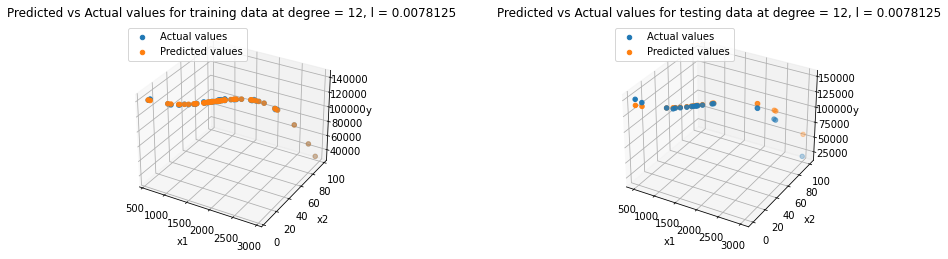

In [ ]:
pr2.runTraining(12, 0.0078125)
fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title(f"Predicted vs Actual values for training data at degree = {12}, l = 0.0078125")
ax.scatter3D(X_train[:,1].flatten(), X_train[:,2].flatten(), Y_train.flatten(), label = 'Actual values')
ax.scatter3D(X_train[:,1].flatten(), X_train[:,2].flatten(), pr2.runTesting(X_train).flatten(), label = 'Predicted values')
ax.legend(loc="upper left")
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Xt[:,1].flatten(), Xt[:,2].flatten(), yt.flatten(), label = 'Actual values')
ax.scatter3D(Xt[:,1].flatten(), Xt[:,2].flatten(), pr2.runTesting(Xt).flatten(), label = 'Predicted values')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title(f"Predicted vs Actual values for testing data at degree = {12}, l = 0.0078125")
ax.legend(loc="upper left")
plt.show()